In [1]:
#https://www.kaggle.com/competitions/titanic/data

**Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [3]:
df = pd.read_csv("train.csv")
print("Shape of data:", df.shape)
print(df.head())
print(df.info())

Shape of data: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

**Handle Missing Values**

In [4]:
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Fill Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop("Cabin", axis=1, inplace=True)

# Drop Ticket and Name (not useful for EDA for now)
df.drop(["Ticket", "Name"], axis=1, inplace=True)

# Encode 'Sex' column
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

/tmp/ipython-input-5-2393486654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-5-2393486654.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


**Exploratory Data Analysis**

/tmp/ipython-input-7-2786170547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


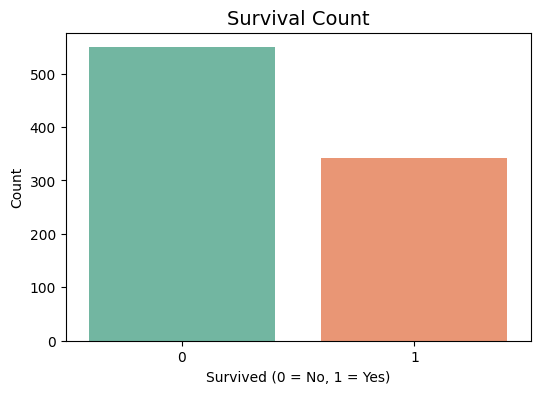

In [7]:
# 1. Survival Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Count', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-8-2721315909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')


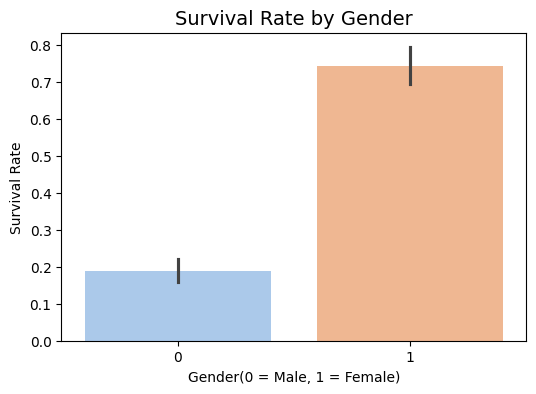

In [8]:
# 2. Survival by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title('Survival Rate by Gender', fontsize=14)
plt.xlabel('Gender(0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

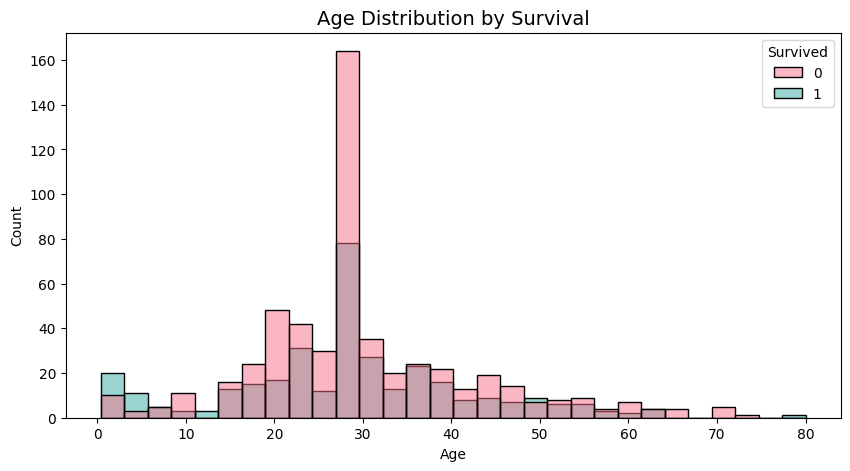

In [9]:
# 3. Age Distribution by Survival
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=False, palette='husl')
plt.title('Age Distribution by Survival', fontsize=14)
plt.show()

/tmp/ipython-input-10-3251322391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Set3')


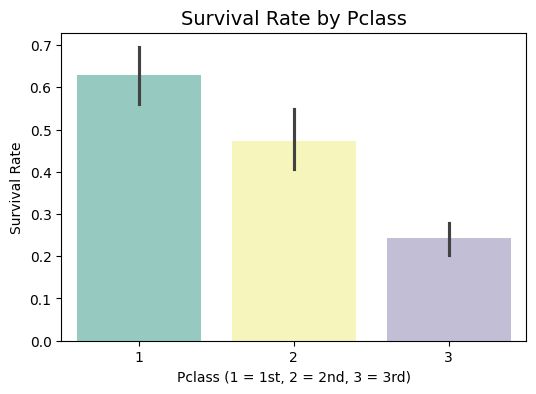

In [10]:
# 4. Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set3')
plt.title('Survival Rate by Pclass', fontsize=14)
plt.xlabel('Pclass (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Survival Rate')
plt.show()

/tmp/ipython-input-11-3360354941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=df, palette='coolwarm')


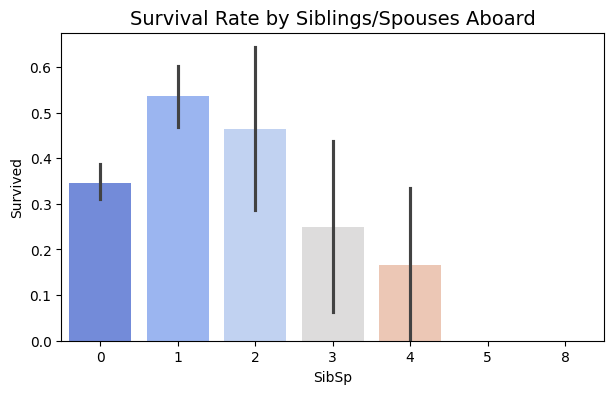

In [11]:
# 5. Survival by Number of Siblings/Spouses
plt.figure(figsize=(7, 4))
sns.barplot(x='SibSp', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Siblings/Spouses Aboard', fontsize=14)
plt.show()

/tmp/ipython-input-12-1534749196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parch', y='Survived', data=df, palette='YlGnBu')


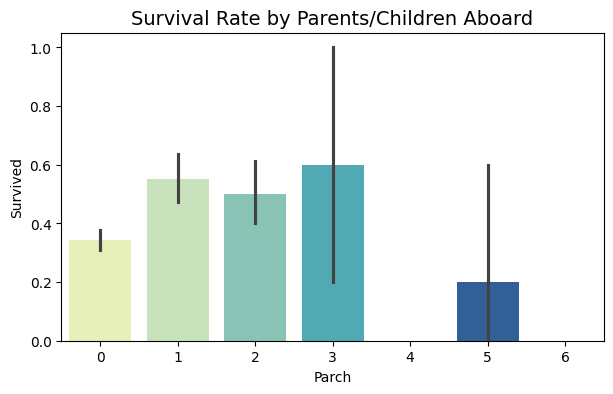

In [12]:
# 6. Survival by Number of Parents/Children
plt.figure(figsize=(7, 4))
sns.barplot(x='Parch', y='Survived', data=df, palette='YlGnBu')
plt.title('Survival Rate by Parents/Children Aboard', fontsize=14)
plt.show()

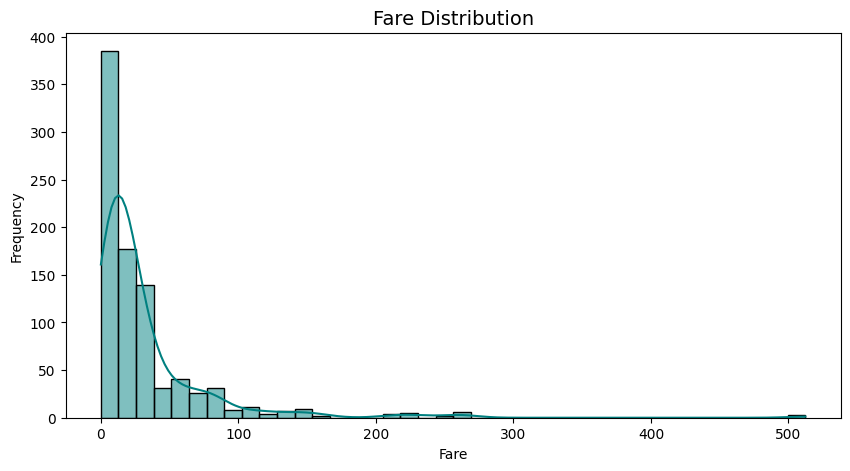

In [13]:
# 7. Fare Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Fare"], bins=40, kde=True, color='teal')
plt.title("Fare Distribution", fontsize=14)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

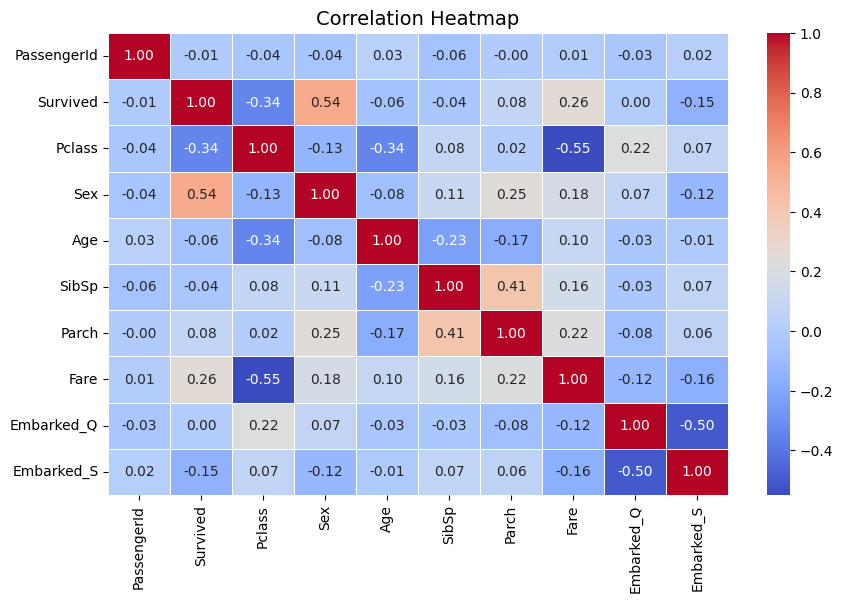

In [14]:
# 8. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()